# Wave Equation

## Daniel Smith

## Math 437

## 4 November 2021

In [288]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy import optimize as opt
from IPython.display import HTML

# Problem 1
Numerically approximate the solution to the following BVP

$$
u_{tt} = u_{xx} \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = \sin(2\pi x), \\
u_t(x,0) = 0. 
$$

Numerically approximate the solution $u(x,t)$ for $t\in[0,0.5]$. Use $J=50$ subintervals in the $x$ dimension and $M=50$ subintervals in the $t$ dimension. Animate the results. Compare you results with the analytic solution $u(x,t) = \sin(2\pi x)\cos(2\pi t).$ This function is know as a standing wave.

In [291]:
def wave_stuff(J, M, s, first_x, last_x, first_T, last_T, u0, u1, ut, f, f2, g, option2 = False, pw = False):
    """
    Parameters:
        J (int): Number of steps in space domain
        M (int): Number of steps in the time domain
        s (float): Coefficient in the PDE
        first_x, last_x, first_T, last_T (floats): Start and Stop values for x and t values 
        u0, u1 (ndarray): Boundary conditions
        ut (ndarray): Partial time derivative condition
        f (func): f(x) in the PDE
        f2 (func): f''(x) used in the approximation
            This is evaluated differently based on parameter option2
        g (func): g(x) in the PDE
        option2 (bool): When false use the second derivative, otherwise, use option2
        pw (bool): This is for problem 4 to handle the piecewise function 
    Returns:
        x (ndarray): the x domain
        U ((ndarray, ndarray)): the solution at each time step 
    """
    # Initialize x, t, U, and get deltaX and deltaT
    x, deltaX = np.linspace(first_x, last_x, J + 1, retstep = True)
    t, deltaT = np.linspace(first_T, last_T, M + 1, retstep = True)
    U = np.zeros((M + 1, J + 1))

    # Initialize lambda and the boundary conditions for x = 0 and x = 1
    lam = s*deltaT/deltaX
    U[:, 0] = u0
    U[:, -1] = u1
    
    # Handle the piecewise function in Problem 4
    if pw:
        for j in range(1, J):
            U[0, j] = f(x[j])
    else:
        U[0, 1:-1] = f(x[1:-1])
    
    # Handle the 2nd derivative of f(x)
    if option2:
        for j in range(1, J):
            U[1, j] = U[0, j] + g(x[j])*deltaT + ((lam**2)/2)*(U[0, j - 1] - 2*U[0, j] + U[0, j + 1])  
    else:
        U[1, 1:-1] = U[0, 1:-1] + g(x[1:-1])*deltaT + (s**2)*f2(x[1:-1])*(deltaT**2)/2
    
    # Construct the matrix A 
    main_diag = np.diag([2*(1 - lam**2)]*(J - 1), 0)
    above_diag = np.diag([lam**2]*(J - 2), 1)
    below_diag = np.diag([lam**2]*(J - 2), -1)
    A = main_diag + above_diag + below_diag
    
    # Update the inner rows of U
    for tt in range(2, M + 1):
        U[tt, 1:-1] = A@U[tt - 1, 1:-1] - U[tt - 2, 1:-1]
    
    return x, U

In [296]:
# Initialize J, M, s, and Start and Stop values for x and t
J, M, s, first_x, last_x, first_T, last_T = 50, 50, 1, 0, 1, 0, 0.5

# Initialize u0, u1, f, f2, and g
u0, u1 = np.zeros(M + 1), np.zeros(M + 1)
f, f2, g = lambda x: np.sin(2*np.pi*x), lambda x: (-4*np.pi**2)*np.sin(2*np.pi*x), lambda x: 0
f, f2, g = np.vectorize(f), np.vectorize(f2), np.vectorize(g)

# Solve 
x1, U1 = wave_stuff(J, M, s, first_x, last_x, first_T, last_T, u0, u1, ut, f, f2, g, option2 = False, pw = False)

In [297]:
# Build animation 
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111)

def update1(i):
    ax.clear()
    ax.set_xlim((0, 1))
    ax.set_ylim((-1, 1))
    ax.plot(x1, U1[i])
    ax.set_title("Standing Wave")
    ax.set_xlabel("x")
    ax.set_ylabel("U(x)")

ani1 = animation.FuncAnimation(fig, update1, frames = range(len(U1)), interval = 30)

In [298]:
HTML(ani1.to_html5_video())

# Problem 2

Consider the boundary value problem 

$$
u_{tt} = u_{xx}, \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = 0.2e^{-m^2(x-1/2)^2} \\
u_t(x,0) = 0.4m^2(x-\frac{1}{2})e^{-m^2(x-1/2)^2}.
$$

The solution of this problem is ta Gaussian pulse. It travels to the right at a constant speed. This solution models, for example, a wave pulse in a stretched string. Note that the fixed boundary conditions reflect the pulse back when it meets the boundary.

Numerically approximate the solution $u(x,t)$ for $t\in[0,1]$. Set $m=20$. Use 200 subintervals in space and 220 in time, and animate your results. Then use 200 subintervals in space and 180 in time, and animate your results. Note that the stability condition is not satisfied for the second mesh.

In [307]:
# Initialize J, M0, M1, s, and Start and Stop values for x and t and m
J, M0, M1, s, first_x, last_x, first_T, last_T, m = 200, 220, 180, 1, 0, 1, 0, 1, 20
u0, u1, u00, u11 = np.zeros(M0 + 1), np.zeros(M0 + 1), np.zeros(M1 + 1), np.zeros(M1 + 1)

# Initialize u0, u1, f, f2, and g
f, f2, g = lambda x: 0.2*np.exp((-(m**2))*(x - 0.5)**2), lambda x: 0, lambda x: (0.4*m**2)*(x - 0.5)*np.exp((-(m**2)*(x - 0.5)**2))
f, f2, g = np.vectorize(f), np.vectorize(f2), np.vectorize(g)

# Solve
x2, U2 = wave_stuff(J, M0, s, first_x, last_x, first_T, last_T, u0, u1, ut, f, f2, g, option2 = True, pw = False)
x3, U3 = wave_stuff(J, M1, s, first_x, last_x, first_T, last_T, u00, u11, ut, f, f2, g, option2 = True, pw = False)

In [308]:
# Build animation for stable solution 
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111)

def update2(i):
    ax.clear()
    ax.set_xlim((0, 1))
    ax.set_ylim((-1, 1))
    ax.plot(x2, U2[i])
    ax.set_title("Gaussian Pulse Part 1")
    ax.set_xlabel("x")
    ax.set_ylabel("U(x)")

ani2 = animation.FuncAnimation(fig, update2, frames = range(len(U2)), interval = 30)

In [309]:
HTML(ani2.to_html5_video())

In [310]:
# Build animation for unstable solution
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111)

def update3(i):
    ax.clear()
    ax.set_xlim((0, 1))
    ax.set_ylim((-1, 1))
    ax.plot(x3, U3[i])
    ax.set_title("Gaussian Pulse Part 2")
    ax.set_xlabel("x")
    ax.set_ylabel("U(x)")

ani3 = animation.FuncAnimation(fig, update3, frames = range(len(U3)), interval = 30)

In [311]:
HTML(ani3.to_html5_video())

# Problem 3

Consider the initial boundary value problem
$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = 0.2e^{-m^2(x-1/2)^2}\\
	u_t(x,0) = 0.
$$
The initial condition separates into two smaller, slower-moving pulses, one travelling to the right and the other to the left.
This solution models, for example, a plucked guitar string

Numerically approximate the solution $u(x,t)$ for $t \in \left[0,2\right]$.
Set $m=20$.
Use 200 subintervals in space and 440 in time, and animate your results.
It is rather easy to see that the solution to this problem is the sum of two travelling waves, one travelling to the left and the other to the right, as described earlier.

In [314]:
# Initialize J, M, s, and Start and Stop values for x and t and u0 and u1 and m
J, M, s, first_x, last_x, first_T, last_T, u0, u1, m = 200, 440, 1, 0, 1, 0, 2, np.zeros(M + 1), np.zeros(M + 1), 20

# Initialize u0, u1, f, f2, and g
f, f2, g = lambda x: 0.2*np.exp((-(m**2))*(x - 0.5)**2), lambda x: 0, lambda x: 0
f, f2, g = np.vectorize(f), np.vectorize(f2), np.vectorize(g)

# Solve
x4, U4 = wave_stuff(J, M, s, first_x, last_x, first_T, last_T, u0, u1, ut, f, f2, g, option2 = True, pw = False)

In [315]:
# Build animation 
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111)

def update4(i):
    ax.clear()
    ax.set_xlim((0, 1))
    ax.set_ylim((-1, 1))
    ax.plot(x4, U4[i])
    ax.set_title("Problem 3")
    ax.set_xlabel("x")
    ax.set_ylabel("U(x)")

ani4 = animation.FuncAnimation(fig, update4, frames = range(len(U4)), interval = 30)

In [316]:
HTML(ani4.to_html5_video())

# Problem 4

Consider the initial boundary value problem

$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = \begin{cases} 1/3 & \text{if } 5/11 < x < 6/11,\\
	0 & \text{otherwise}
	\end{cases}\\
	u_t(x,0) = 0.
$$

Numerically approximate the solution $u(x,t)$ for $t \in \left[0, 2\right]$.
Use 200 subintervals in space and 440 in time, and animate your results.
Even though the method is second order and stable for this discretization, since the initial condition is discontinuous there are large dispersive errors.

In [321]:
# Initialize J, M, s, and Start and Stop values for x and t and u0 and u1 and m
J, M, s, first_x, last_x, first_T, last_T, u0, u1, m = 200, 440, 1, 0, 1, 0, 2, np.zeros(M + 1), np.zeros(M + 1), 20

# Initialize u0, u1, f, f2, and g
f, f2, g = lambda x: 1/3 if (x <= 6/11 and x >= 5/11) else 0, lambda x: 0, lambda x: 0

# Solve
x5, U5 = wave_stuff(J, M, s, first_x, last_x, first_T, last_T, u0, u1, ut, f, f2, g, option2 = True, pw = True)

In [322]:
# Build animation 
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111)

def update5(i):
    ax.clear()
    ax.set_xlim((0, 1))
    ax.set_ylim((-1, 1))
    ax.plot(x5, U5[i])
    ax.set_title("Problem 4")
    ax.set_xlabel("x")
    ax.set_ylabel("U(x)")

ani5 = animation.FuncAnimation(fig, update5, frames = range(len(U5)), interval = 30)

In [323]:
HTML(ani5.to_html5_video())

# Problem 5


Numerically solve the initial value problem

$$
	u_t -su_x + uu_x = u_{xx}, \quad x \in (-\infty,\infty),\\
	u(x,0) = v(x),
$$

for $t \in [0,1]$.
Let the perturbation $v(x)$ be given by

$$
v(x) = 3.5(\sin{(3x)} + 1)\frac{1}{\sqrt{2\pi}} \exp{(-x^2/2)}
$$

And let the initial condition be $u(x, 0) = \hat{u}(x) + v(x)$
Approximate the $x$ domain,$(-\infty, \infty)$, numerically by the finite interval $[-20,20]$, and fix $u(-20) = u_-$, $u(20) = u_+$. Let $u_- = 5$, $u_+ = 1$.
Use 150 intervals in space and 350 steps in time.
Animate your results.
You should see the solution converge to a translate of the travelling wave $\hat{u}$.

Hint: This difference scheme is no longer a linear equation.
We have a nonlinear equation in $U^{n+1}$.
We can still solve this function using Newton's method or some other similar solver.
In this case, use `scipy.optimize.fsolve`.

In [324]:
J, M, s, a, v, delta = 150, 350, 3, 2, 1, 0.01 # Initialize J, M, s, a, v, and delta
x, deltaX = np.linspace(-20, 20, J + 1, retstep = True) # Get x and deltaX
t, deltaT = np.linspace(0, 1, M + 1, retstep = True) # Get t and deltaT

# Get K1 and K2
K1 = deltaT/(4*deltaX)
K2 = deltaT/(2*(deltaX**2))

# Initialize u_hat and nu
u_hat = lambda x: s - a*np.tanh((a*x)/(2*v) + delta)
u_hat = np.vectorize(u_hat)
nu = lambda x: 3.5*(np.sin(3*x) + 1)*(1/(np.sqrt(2*np.pi)))*np.exp(-(x**2)/2)
nu = np.vectorize(nu)

# Initialize U and boundary conditions 
U = np.zeros((M + 1, J + 1))
U[:, 0] = 5
U[:, -1] = 1
U[0, 1:-1] = u_hat(x[1:-1]) + nu(x[1:-1])

for m in range(1, M + 1):
    def func(X):
        """
        This function will optimize each row when passed into fsolve 
        """
        row = np.concatenate((np.array([5]), X, np.array([1])))
        Un = U[m - 1, 1:-1]
        term1 = -Un
        term2 = -K1*((s - X)*(row[2:] - row[:-2]) + (s - Un)*(U[m - 1, 2:] - U[m - 1, :-2]))
        term3 = -K2*((row[2:] - 2*X + row[:-2]) + (U[m - 1, 2:] - 2*Un + U[m - 1, :-2]))
        return X + (term1 + term2 + term3)
    
    result = opt.fsolve(func, x0 = U[m - 1, 1:-1]) # Optimize each row 
    U[m, 1:-1] = result # Update the corresponding column of U

In [325]:
# Build animation 
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111)

def update6(i):
    ax.clear()
    ax.set_xlim((-20, 20))
    ax.set_ylim((0, 6))
    ax.plot(x, U[i])
    ax.set_title("Problem 5")
    ax.set_xlabel("x")
    ax.set_ylabel("U(x)")

ani6 = animation.FuncAnimation(fig, update6, frames = range(len(U)), interval = 30)

In [326]:
HTML(ani6.to_html5_video())

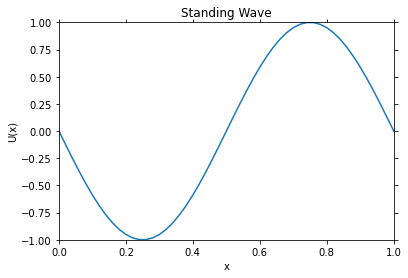

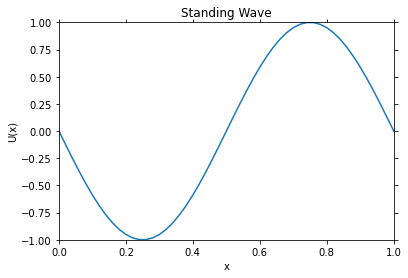

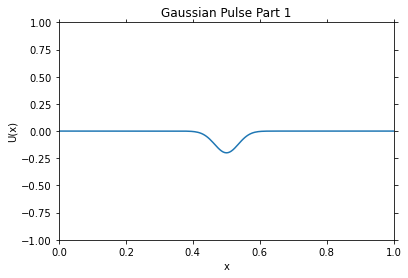

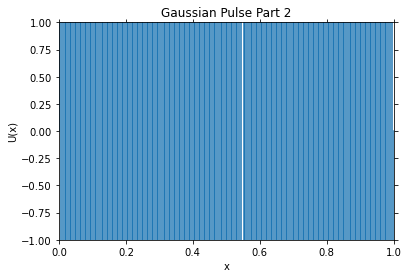

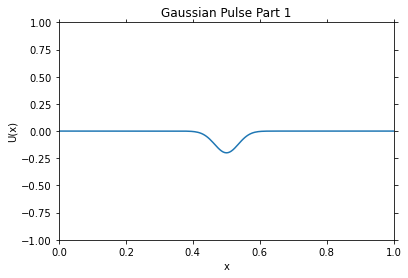

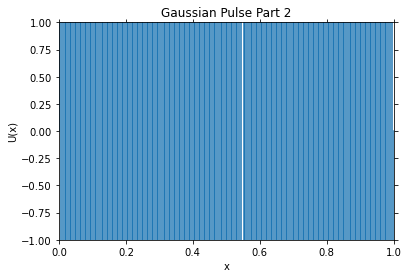

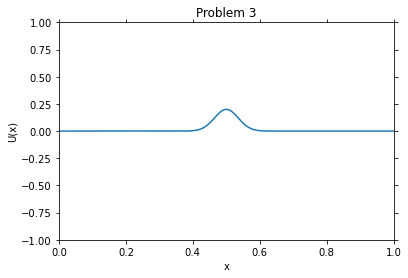

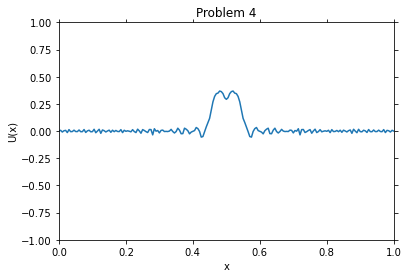

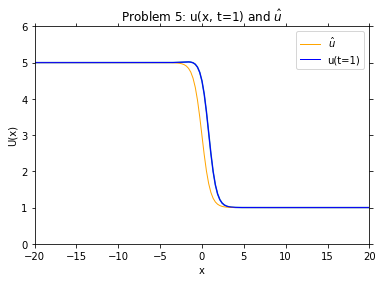

In [327]:
# Build comparison plot 
plt.plot(x, u_hat(x), color = "orange", label = "$\hat{u}$", linewidth = 1)
plt.plot(x, U[-1], color = "blue", label = "u(t=1)", linewidth = 1)
plt.ylim(0, 6)
plt.legend()
plt.title("Problem 5: u(x, t=1) and $\hat{u}$")
plt.show()